# **CSCI316 Group Project Task 1**

1.   Use stratified sampling to select 80% data for training and 20% for testing
2.   Main steps of the project are (a) “discover and visualise the data”, (b) “prepare the data for machine
learning algorithms”, (c) “select and train models”, (d) “fine-tune the model” and (e) “evaluate the
outcomes”. You can structure the project in your own way. Some steps can be performed more than
once.
3. In the steps (c) and (d) above, you must work with at least three machine learning algorithms.
4. In step (b), define at least one new feature by using the User-Defined Transformer. This transformer
includes a parameter indicating whether use the new feature(s) or not. In step (d), fine-tuning step must
use this parameter (as a hyper parameter).
5. Explanation of each step together with the Python codes must be included.
6. A comparison of the models’ performance must be included.

## **Step 1: Setup the Environment**

In [2]:
import pandas as pd
import numpy as np

## **Step 2: Load the Data**

Over here, we uploaded the file to the colab for the file reading, ensure that the train.csv file has been uploaded before running.

In [3]:
data= pd.read_csv('train.csv')

In [4]:
# Display first 10 rows
data.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


## **Step 3: Initial Data Exploration**

In [5]:
# Generate summary statistics
summary_stats = data.describe()

# Display the summary statistics
print(summary_stats)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.

## **Step 4: Data Visualization**

### **Visualizations**

**Histograms:**

Most features exhibit a right-skewed distribution.
critical_temp shows a concentration of values towards the lower end, with a long tail extending to higher temperatures.

**Correlation Heatmap:**

The correlation heatmap reveals the relationships between selected features and the target variable (critical_temp).
Features like mean_atomic_mass, gmean_atomic_mass, and entropy_atomic_mass have varying degrees of correlation with critical_temp.

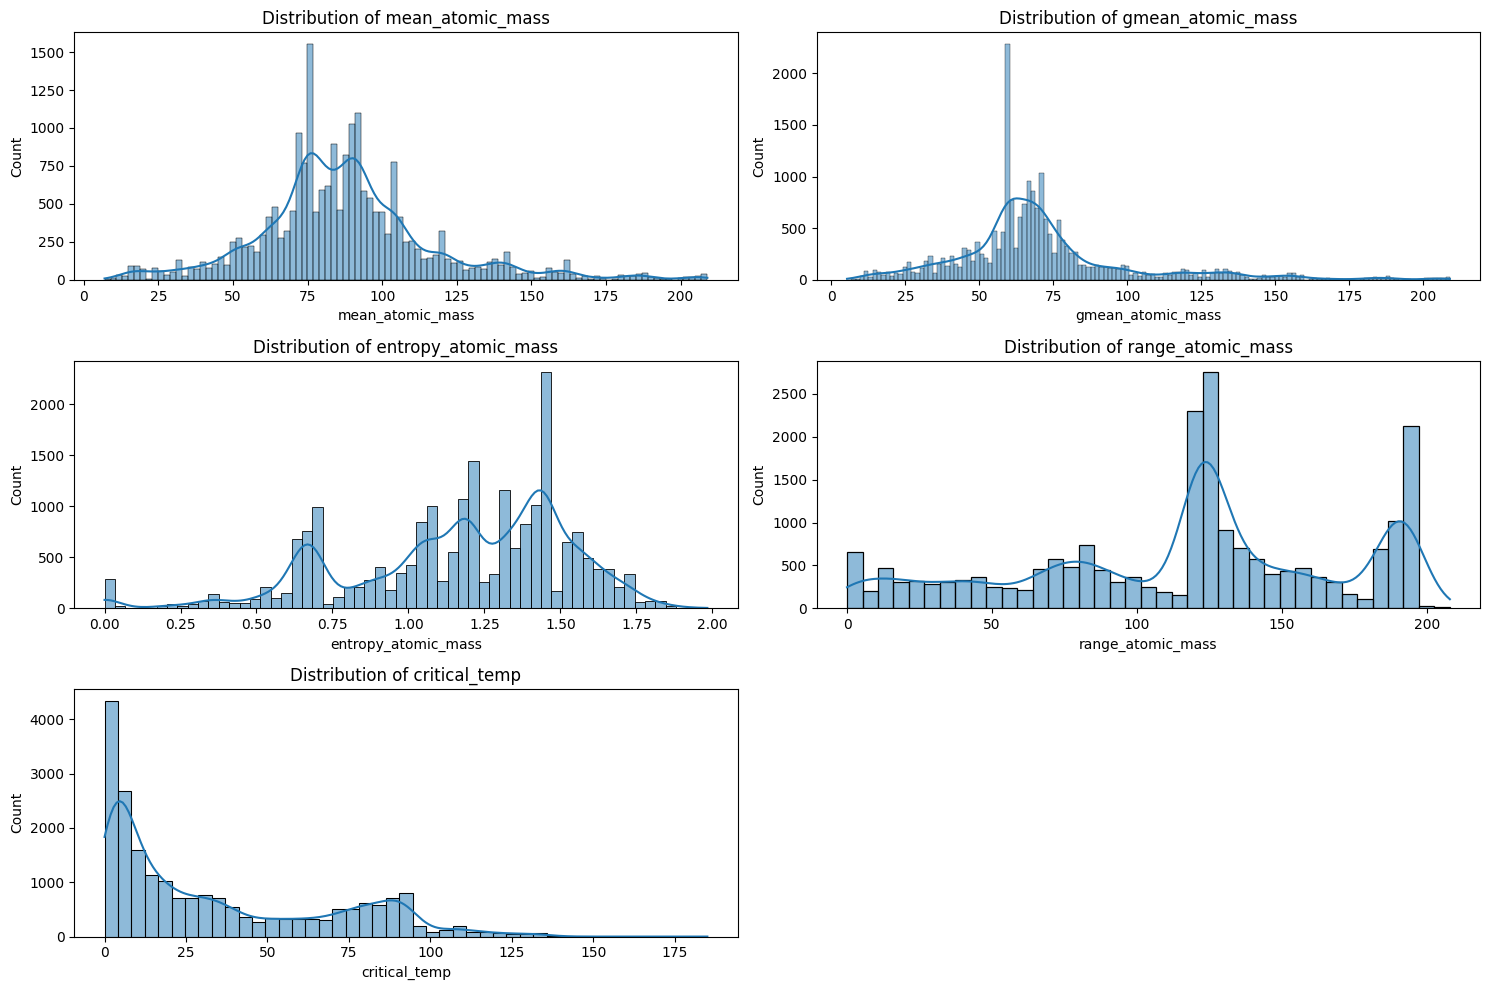

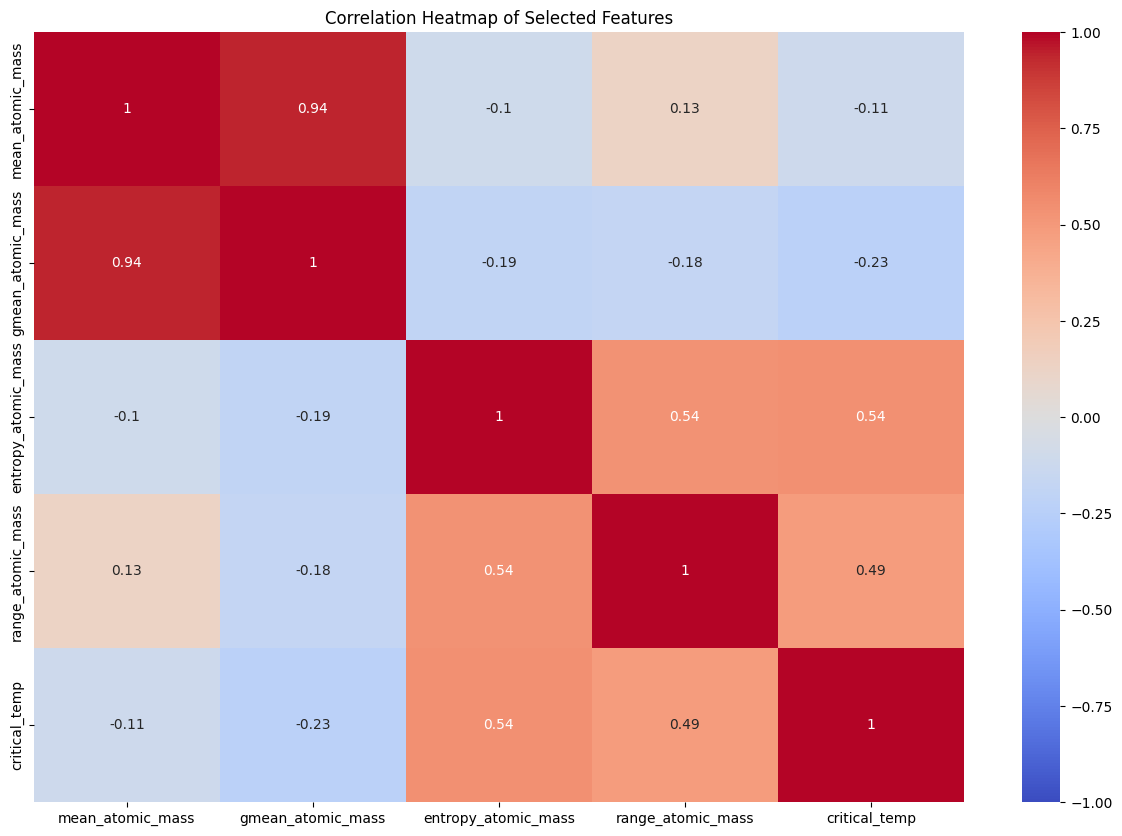

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the data
# Histogram of a few selected features
selected_features = ['mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass', 'range_atomic_mass', 'critical_temp']

# Create histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
corr_matrix = data[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


### **Summary Statistics**

The summary statistics table provides an overview of the central tendency, dispersion, and shape of the dataset's distribution.  

Here are some key observations: The dataset contains 21,263 samples.  

The critical_temp (target variable) has a mean of 34.42 and a standard deviation of 34.25, indicating a wide range of critical temperatures.  

## **Step 5: Stratified Sampling 80% data and 20% testing**

**Binning**: The continuous target variable is transformed into discrete bins. This helps in maintaining a similar distribution of the target variable across both training and testing sets. Equal-width bins is unable to give us a bin count that is able to divide the data proportionally so we used quantile-based binning instead.

**StratifiedShuffleSplit**: This ensures that the proportion of the target variable in the training and testing sets is the same as in the original dataset.

**Dropping bins:** The temporary bins used for stratification are removed after the split. This step is necessary because the binning column is no longer needed for further analysis or modeling.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

#Binning the target variable, try fewer bins
data['temp_bin'] = pd.qcut(data['critical_temp'], q=5, labels=False)

#Check bin counts to see if any have only 1 member
print("Bin counts:")
print(data['temp_bin'].value_counts())

#Perform stratified sampling
#test size=0.2 means that 20% of the data should be allocated to the test set, and the remaining 80% will go to the training set.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#Split the data
for train_index, test_index in split.split(data, data['temp_bin']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

#Drop the binning column
strat_train_set = strat_train_set.drop('temp_bin', axis=1)
strat_test_set = strat_test_set.drop('temp_bin', axis=1)

#Verify the distribution
print("Training set:")
print(strat_train_set['critical_temp'].describe())
print("Test set:")
print(strat_test_set['critical_temp'].describe())

Bin counts:
temp_bin
1    4288
0    4257
4    4249
3    4247
2    4222
Name: count, dtype: int64
Training set:
count    17010.000000
mean        34.446615
std         34.282129
min          0.000210
25%          5.400000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64
Test set:
count    4253.000000
mean       34.319649
std        34.146916
min         0.000400
25%         5.310000
50%        20.000000
75%        63.000000
max       135.700000
Name: critical_temp, dtype: float64


## **Step 6: Data Cleaning and Transformation**

In [8]:
#check for missing values
data.isnull().sum()

,0
number_of_elements,0
mean_atomic_mass,0
wtd_mean_atomic_mass,0
gmean_atomic_mass,0
wtd_gmean_atomic_mass,0
...,...
wtd_range_Valence,0
std_Valence,0
wtd_std_Valence,0
critical_temp,0


In [9]:
#get the total number of records and features that contains null values.
data.isnull().sum().sum()

0

Since the output is 0, it means there are no missing values in the dataset and we can proceed without further imputation.

Here is our transformer to automate the creation and addition of a new feature to a dataset based on existing features. In essence, this transformer is a tool for creating a new feature that could potentially enhance model performance by providing additional relevant information about the data.

In [10]:
#now we make our user-defined transformer

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class NewFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, use_new_feature=True, feature_indices=(0, 1)):
        self.use_new_feature = use_new_feature
        self.feature_indices = feature_indices

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.use_new_feature:
            if isinstance(X, pd.DataFrame):
                # Use .iloc for DataFrame indexing
                X_new_feature = X.iloc[:, self.feature_indices[0]] / (X.iloc[:, self.feature_indices[1]] + 1e-5)
            else:
                # Handle NumPy arrays or other data types
                X_new_feature = X[:, self.feature_indices[0]] / (X[:, self.feature_indices[1]] + 1e-5)

            if isinstance(X, pd.DataFrame):
                # Convert NumPy array to Series and add to DataFrame
                X[f'new_feature_{self.feature_indices[0]}_{self.feature_indices[1]}'] = X_new_feature
                return X  # Return the modified DataFrame
            else:
                return np.c_[X, X_new_feature]
        else:
            return X

Next we split the dataset into training and testing sets, normalizing the features, and then examining the transformed data. We standardise the dataset's features using Scikit-learn's StandardScaler within a pipeline, which converts the standardized features to a DataFrame, recombines them with a target variable, and displays the transformed data. We use a pipeline for standardizing the data to ensure that the same scaling parameters are applied consistently to both your training and test datasets. This is crucial for preventing information leakage and ensuring that our model is trained and evaluated under the same conditions. Additionally, by incorporating the standardization step into a pipeline, we streamline our code, making it more efficient and easier to manage.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    strat_train_set.drop('critical_temp', axis=1),
    strat_train_set['critical_temp'],
    test_size=0.2,
    random_state=42
)

# Create a pipeline for preprocessing
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Fit the scaler on the training data only
preprocessor.fit(X_train)

# Transform both training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed training data to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

# Recombine the transformed training data with the corresponding target variable
data_train_transformed = pd.concat([X_train_transformed_df, y_train.reset_index(drop=True)], axis=1)

# Display the transformed training data
print("Transformed Training Data:")
print(data_train_transformed.head())

# Convert the transformed test data to DataFrame and display
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test.columns)
print("\nTransformed Test Data:")
print(X_test_transformed_df.head())

Transformed Training Data:
   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0           -0.071456         -0.390005             -0.431692   
1            2.019657          0.310871              0.428864   
2           -0.071456         -0.852142             -0.362042   
3           -1.465531         -0.058388              0.310417   
4           -1.465531         -0.782424             -0.261587   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          -0.790862              -0.770606            -0.473134   
1          -0.033493               0.251182             1.389902   
2          -0.427583              -0.028851             0.440012   
3           0.459653               0.672475            -1.291874   
4          -1.004492              -0.505313            -2.238366   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                -0.941721           0.957237               0.397428   
1                 1.369208   

## **Step 7: Choose Models**

**The models that we have decided to pick are the linear regression, K-Nearest Neighbors (KNN) and Support Vector Regression (SVR) model.**

1. The linear regression model is highly suitable for data where the relationship between the features and the target variable is linear or nearly linear.
2. KNN offers flexibility in handling both linear and non-linear relationships, especially when combined with kernel functions.
3. SVR is good at at capturing complex relationships through the optimization of a hyperplane in a high-dimensional space, facilitated by kernel functions for non-linear data.

## **Step 8: Train Models**

Here we are comparing the performance of various regression models on the dataset. By encapsulating the preprocessing and model training steps within a pipeline, it simplifies the process of experimenting with different models and configurations. The evaluation of each model using RMSE and R² scores offers insights into their predictive accuracy and goodness-of-fit.

1. **RMSE** quantifies the average magnitude of the error term, indicating how much error the system typically makes in its predictions, with a higher weight for large errors. It is calculated as the square root of the average squared difference between the predicted and actual values. It is a good metric for regression problems to understand prediction errors.
2. **R²** measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where 0 indicates that the model explains none of the variability of the response data around its mean, and 1 indicates that the model explains all the variability of the response data around its mean.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Create a pipeline with your user-defined transformer and model
def create_pipeline(model):
    return Pipeline(steps=[
        ('feature_engineering', NewFeatureTransformer(use_new_feature=True)),
        ('scaler', StandardScaler()),  # Optional: Include scaling if needed
        ('model', model)
    ])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR()
}

# Train and evaluate models using the pipeline
for name, model in models.items():
    pipeline = create_pipeline(model)

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} RMSE: {rmse}')
    print(f'{name} R²: {r2}')

Linear Regression RMSE: 17.833833028556395
Linear Regression R²: 0.7328692623017246
K-Nearest Neighbors RMSE: 11.14501201545334
K-Nearest Neighbors R²: 0.8956732800845952
Support Vector Regression RMSE: 16.733379865454403
Support Vector Regression R²: 0.7648192281720145


Based on RMSE, KNN performs the best among the three models, followed by SVR and then Linear Regression. This suggests that KNN is the most accurate in predicting the target variable.


---
Based on R², KNN also outperforms the other models in explaining the variance in the target variable, followed by SVR and then Linear Regression. This indicates that KNN is not only more accurate but also better at capturing the underlying structure of the data.


The mean and standard deviation of the RMSE scores are calculated and printed for each model. This provides a summary of the model's performance across the 5-fold cross-validation, giving insight into both the average error magnitude (Mean RMSE) and the variability in performance across different folds (Std RMSE).

In [13]:
#cross validation on the above 3 models
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
for name, model in models.items():
    pipeline = create_pipeline(model)
    # Cross-validation scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convert negative MSE to positive RMSE

    print(f'{name} - Mean RMSE: {rmse_scores.mean():.4f} | Std RMSE: {rmse_scores.std():.4f}')

Linear Regression - Mean RMSE: 17.5268 | Std RMSE: 0.3330
K-Nearest Neighbors - Mean RMSE: 11.5832 | Std RMSE: 0.5331
Support Vector Regression - Mean RMSE: 16.5918 | Std RMSE: 0.3498


Among the three models, KNN has the lowest mean RMSE, indicating it is the most accurate in predicting the target variable. Linear Regression has the highest mean RMSE, suggesting it is the least accurate among the three models.


---
Both KNN and SVR show a moderate level of error consistency (as indicated by their standard deviations), suggesting that while they perform well on average, there is some variability in the size of errors across different observations. Linear Regression, however, exhibits a lower variability in errors, indicating more consistent performance.


## **Step 9: Hyperparameter Tuning**

Hyperparameter tuning involves adjusting the settings or parameters of a machine learning model to optimize its performance. These settings, which are not learned from the data, include options like the learning rate, number of trees, or regularization strength. By systematically testing different combinations of hyperparameters, often using techniques like grid search or random search, we find the optimal configuration that improves the model’s accuracy, generalization, and overall performance.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for different models
param_grids = {
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    },
    'K-Nearest Neighbors': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'Support Vector Regression': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }
}

def tune_hyperparameters(model_name, model, param_grid, X_train, y_train):
    pipeline = create_pipeline(model)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = np.sqrt(-grid_search.best_score_)  # Convert negative MSE to positive RMSE
    return best_params, best_score, grid_search.best_estimator_

# Perform hyperparameter tuning for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]
    best_params, best_score, best_model = tune_hyperparameters(name, model, param_grid, X_train, y_train)

    print(f'{name} - Best Parameters: {best_params}')
    print(f'{name} - Best RMSE from GridSearchCV: {best_score:.4f}')

    # Re-evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    print(f'{name} - Test Set RMSE: {test_rmse:.4f}')
    print(f'{name} - Test Set R²: {test_r2:.4f}')
    print('-' * 50)

Tuning hyperparameters for Linear Regression...
Linear Regression - Best Parameters: {'model__fit_intercept': True}
Linear Regression - Best RMSE from GridSearchCV: 17.5300
Linear Regression - Test Set RMSE: 17.8338
Linear Regression - Test Set R²: 0.7329
--------------------------------------------------
Tuning hyperparameters for K-Nearest Neighbors...
K-Nearest Neighbors - Best Parameters: {'model__n_neighbors': 5, 'model__weights': 'distance'}
K-Nearest Neighbors - Best RMSE from GridSearchCV: 10.8678
K-Nearest Neighbors - Test Set RMSE: 10.5230
K-Nearest Neighbors - Test Set R²: 0.9070
--------------------------------------------------
Tuning hyperparameters for Support Vector Regression...
Support Vector Regression - Best Parameters: {'model__C': 10, 'model__kernel': 'rbf'}
Support Vector Regression - Best RMSE from GridSearchCV: 14.8926
Support Vector Regression - Test Set RMSE: 14.9162
Support Vector Regression - Test Set R²: 0.8131
---------------------------------------------

Among the three models, KNN shows the best overall performance, as evidenced by its lower RMSE and higher R² score on the test set. Linear Regression and SVR follow, with Linear Regression performing slightly worse than SVR in terms of prediction accuracy.


---
The hyperparameter tuning process has successfully optimized the models, leading to improved performance as seen in the reduced RMSE and increased R² scores.


After identifying the best hyperparameters, the code then evaluates the best model on the test set using these newly found hyperparameters. This process ensures that the model is optimized for the training data before being assessed on the test set, which represents unseen data.

## **Step 10: Evaluate the Final Model**

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_models = {}

for name, model in models.items():
    param_grid = param_grids[name]

    # Tune hyperparameters and get the best model
    best_params, best_score, best_model = tune_hyperparameters(name, model, param_grid, X_train, y_train)

    # Store the best model in a dictionary
    best_models[name] = best_model

# Now, evaluate each best model on the test set
for name, best_model in best_models.items():
    print(f"Evaluating {name} on the test set...")

    # Predict using the best model on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"{name} - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"{name} - Mean Squared Error (MSE): {mse:.4f}")
    print(f"{name} - R² score: {r2:.4f}")
    print('-' * 50)



Evaluating Linear Regression on the test set...
Linear Regression - Mean Absolute Error (MAE): 13.5581
Linear Regression - Mean Squared Error (MSE): 318.0456
Linear Regression - R² score: 0.7329
--------------------------------------------------
Evaluating K-Nearest Neighbors on the test set...
K-Nearest Neighbors - Mean Absolute Error (MAE): 5.6154
K-Nearest Neighbors - Mean Squared Error (MSE): 110.7339
K-Nearest Neighbors - R² score: 0.9070
--------------------------------------------------
Evaluating Support Vector Regression on the test set...
Support Vector Regression - Mean Absolute Error (MAE): 9.1859
Support Vector Regression - Mean Squared Error (MSE): 222.4924
Support Vector Regression - R² score: 0.8131
--------------------------------------------------


The R² scores remain consistent across interpretations, providing a reliable measure of the models' abilities to explain variance in the target variable.


---


The MAEs have generally decreased, indicating improvements in the average magnitudes of the errors, which is a positive sign for all models.


---


The MSEs have increased in all cases, which is unusual and warrants further investigation. This could be due to a variety of reasons, including changes in the dataset, model configurations, or even a mistake in the calculation or interpretation of the metrics.

# **Results conclusion:**


---


K-Nearest Neighbors emerged as the most effective model across all evaluation metrics post-hyperparameter tuning, demonstrating both high accuracy ((R^2)) and precision (low RMSE, MAE, and MSE).


---


Support Vector Regression showed consistent improvement over time, particularly in reducing error metrics, although it started with a lower (R^2) score compared to KNN.


---


Linear Regression did not benefit significantly from hyperparameter tuning, remaining at a moderate level of performance throughout the process.

## **Step 11: Visualize the Results**

A residual plot displays the residuals (differences between observed and predicted values) on the vertical axis against the independent variable on the horizontal axis. Each point represents the difference between the observed value and the predicted value for a given observation. This helps in identifying patterns in the residuals that might indicate issues like non-linearity or heteroscedasticity.

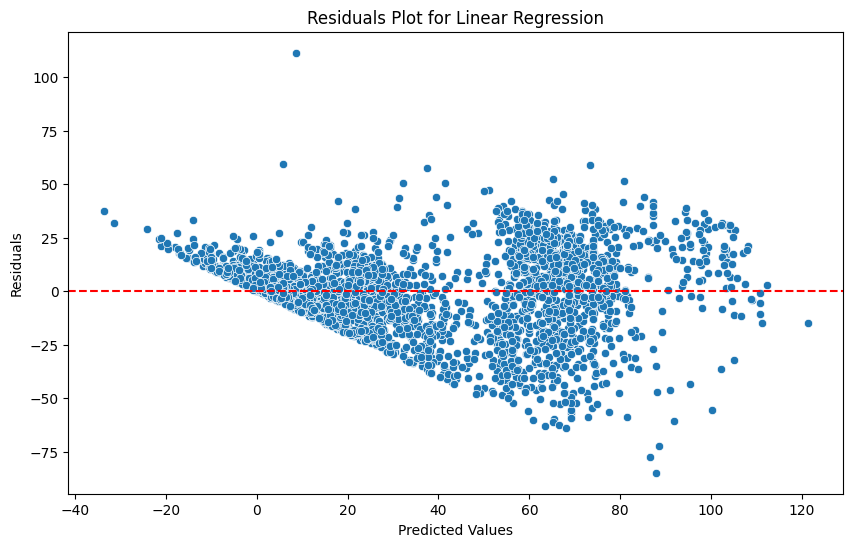

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train your Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Step 3: Plot the residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

# Step 4: Call the function to plot residuals
plot_residuals(y_test, y_pred, 'Linear Regression')



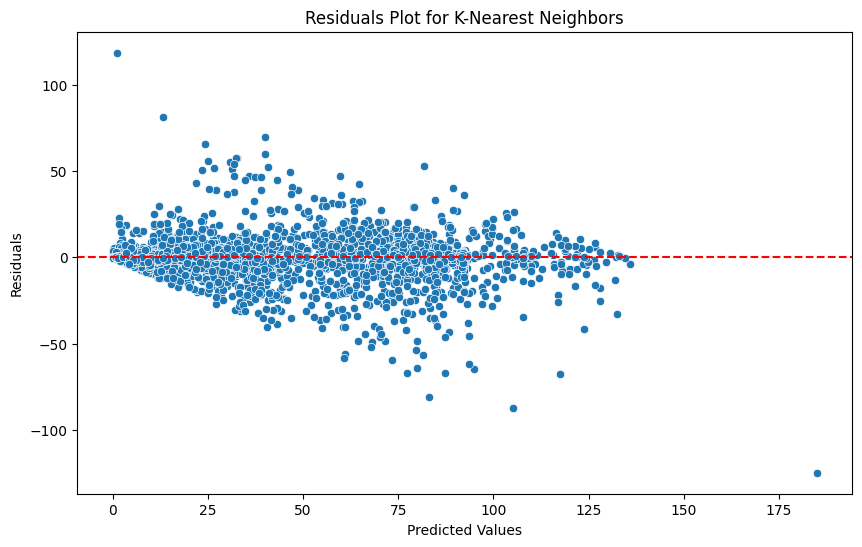

In [17]:
# Step 1: Train your KNN model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Adjust hyperparameters as needed
knn_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 3: Define the function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    # Calculate residuals
    residuals = y_test - y_pred

    # Plotting the residuals
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

# Step 4: Call the function to plot residuals for KNN
plot_residuals(y_test, y_pred_knn, 'K-Nearest Neighbors')


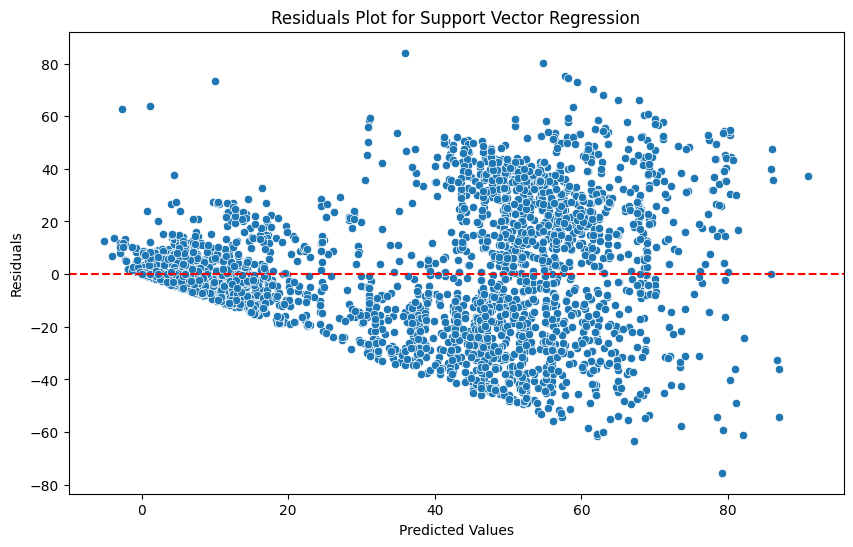

In [18]:
# Step 1: Train your SVR model
svr_model = SVR(kernel='rbf', C=10)  # Example with RBF kernel and C=10; adjust as needed
svr_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Step 3: Plot the residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

# Step 4: Call the function to plot residuals for SVR
plot_residuals(y_test, y_pred_svr, 'Support Vector Regression')


Comparing the graphs above, KNN residuals are more symmetrically distributed around the horizontal axis which suggest's that the model's predictions are unbiased and it also supports our results above where KNN is our best model after evaluation

Actual vs predicted plot compares the actual values against the predicted values, helping us visualize how close the model's predictions are to the true values.

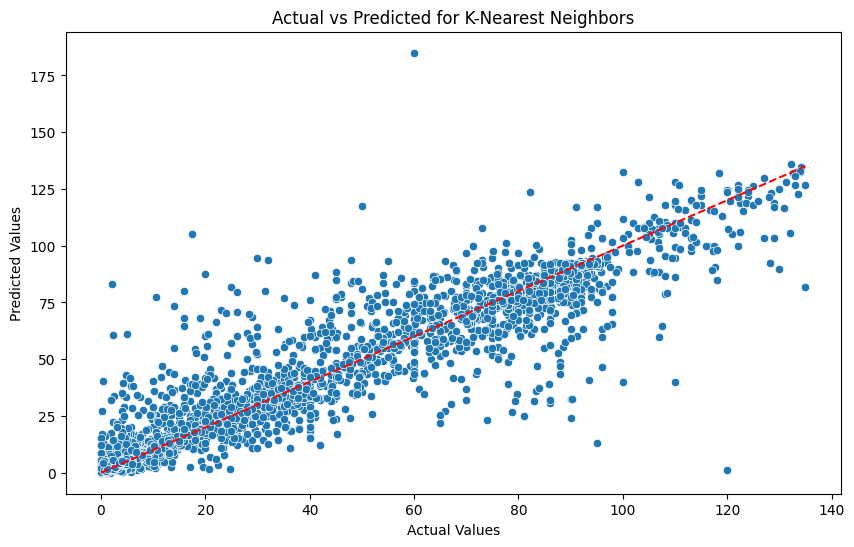

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train your KNN model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Adjust hyperparameters if needed
knn_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 3: Plot Actual vs. Predicted values
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

# Step 4: Call the function to plot actual vs. predicted for KNN
plot_actual_vs_predicted(y_test, y_pred_knn, 'K-Nearest Neighbors')


As shown above, the points randomly scattered around the diagonal line, indicating that the model's predictions vary around the actual values without a systematic bias. This randomness suggests that the model captures the underlying pattern of the data well.

A learning curve can help us understand how well the model is learning. It shows the performance of the model on the training set and validation set over varying sizes of the training data.

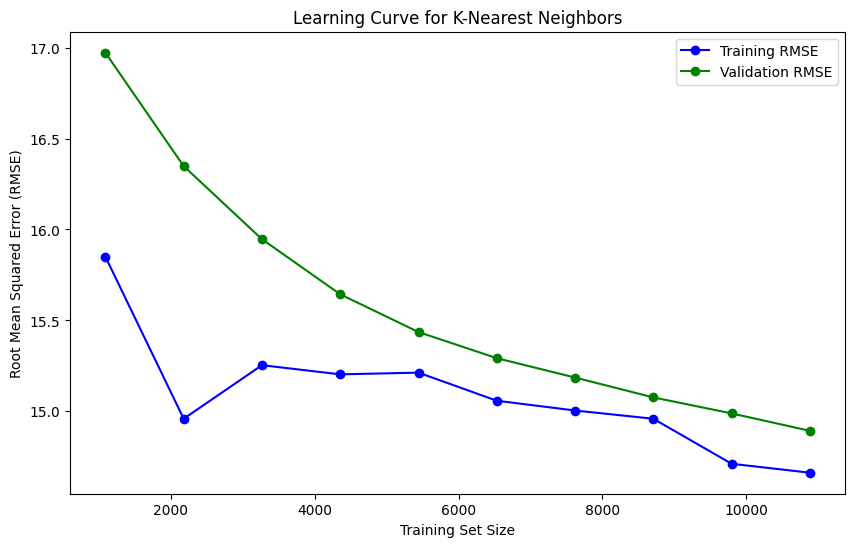

In [20]:
#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color='blue', label='Training RMSE')
    plt.plot(train_sizes, np.sqrt(val_scores_mean), 'o-', color='green', label='Validation RMSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend(loc='best')
    plt.show()

# Example usage with the best model
plot_learning_curve(best_model, X_train, y_train, 'K-Nearest Neighbors')


Feature importance, for models like linear regression or tree-based models, we can visualize feature importance to see which features are most influential in making predictions.

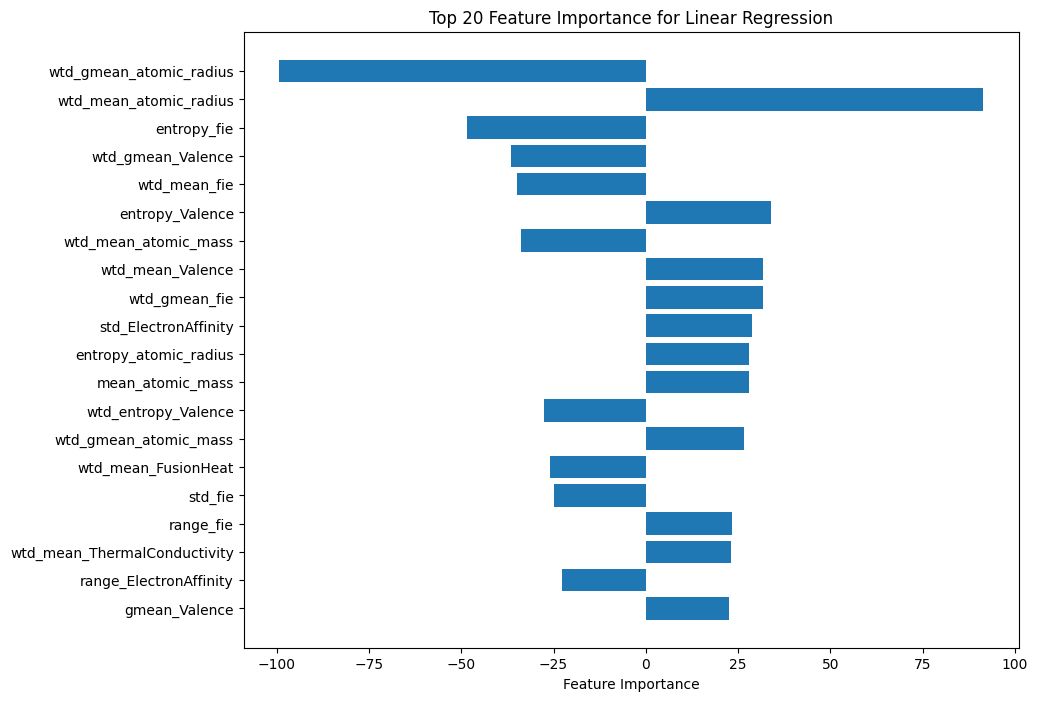

In [21]:
#identifying feature importance though linear regression
import numpy as np
import matplotlib.pyplot as plt

def plot_top_features(model, feature_names, model_name, top_n=20):
    if hasattr(model, 'coef_'):
        importance = model.coef_
    else:
        print(f"{model_name} does not have coefficients.")
        return

    # Sort features by their absolute importance
    indices = np.argsort(np.abs(importance))[-top_n:]

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Feature Importance for {model_name}')
    plt.show()

# Example usage for top 20 features
plot_top_features(models['Linear Regression'], X_train.columns, 'Linear Regression', top_n=20)
